# A quick notebook to check all the code imports

Though going forward, I will start writing tests, in the meanwhile here is some quick tests to see all is okay.

## Test Ising with Sampling 

In [19]:
from MaxEnt import NumIsing
import numpy as np
import matplotlib.pyplot as plt
import time

In [3]:
def test_pert_init():  
    N = 5
    avgs = 0.05*np.ones(N) # prob of every neuron firing in a window is 0.5
    corrs = 0.002*np.triu(np.ones((N,N)),1) # prob of 2 neurons firing in the same window is 0.2 
    print("Init model")
    ising = NumIsing(N, avgs, corrs, lr=0.5,analytic=True) 
    ising.pert_init()
    print(ising.avgs, ising.corrs)
    
    pred_avgs = ising.averages(analytic=True)
    print("Predicted averages:", np.round(pred_avgs,4))
    pred_corrs = ising.correlations(analytic=True)
    print("Predicted correlations:", np.round(pred_corrs,4))

def test_MC():
    N=20
    
    avgs = 0.5*np.ones(N) # prob of every neuron firing in a window is 0.5
    corrs = 0.2*np.triu(np.ones((N,N)),1) # prob of 2 neurons firing in the same window is 0.2 
    print("Init model")
    ising = NumIsing(N, avgs, corrs, lr=0.5) 
    
    print("State space ", 2**N)
    N_samples=1000; chains=4; N_sets=10; updates_per_set=100; M = N_samples*chains
    print(f"{N_sets} sets of {M} samples will be generated, for a total of {N_sets*M} states")
    
    print("Starting gradient ascent with sampling")
    start = time.time()
    ising.num_gradient_ascent(N_samples, chains, N_sets, updates_per_set) 
    stop = time.time()
    print("Stop grad ascent, time: ",stop-start,"s")
    
    pred_avgs = ising.averages()
    print("Predicted averages:", np.round(pred_avgs,4))
    # pred_corrs = ising.correlations()
    # print("Predicted correlations:", np.round(pred_corrs,4))


def test_correlations():
    N = 5
    avgs = 0.5*np.ones(N) # prob of every neuron firing in a window is 0.5
    corrs = 0.2*np.triu(np.ones((N,N)),1) # prob of 2 neurons firing in the same window is 0.2 
    
    print("Init model")
    ising = NumIsing(N, avgs, corrs, lr=0.5,analytic=True) 
    
    print("Starting grad ascent")
    ising.num_gradient_ascent() #
    print("Stop grad ascent")
    
    pred_avgs = ising.mod_avgs
    pred_corrs = ising.mod_corrs
    print("Predicted averages:", np.round(pred_avgs,4), "Predicted correlations:", np.round(pred_corrs,4),sep="\n")

    #test averages
    print("Default", ising.correlations())
    print("Analytic", ising.correlations(analytic=True))
    print("Compute",ising.correlations(compute=True))
    ising.save_samples()
    print("After more samples",ising.correlations(compute=True))

def test_samples(): #fix this
    N = 10
    print("Init model")
    ising = NumIsing(N, 0.5*np.ones(N), 0.2*np.triu(np.ones((N,N)),1), lr=0.5, analytic=True) 

    M = 500000
    chains = 10
    start = time.time()
    samples = ising.gibbs_sampling(M,chains)
    stop = time.time()
    print(f"Time to generate {chains}x{M} samples", stop-start)

    means_true = ising.averages(analytic=True)
    means_sample = np.mean(samples, axis=0)
    
    dp = 5 #decimal places
    print("True means", np.round(means_true,dp), "Sample means", np.round(means_sample,dp), sep="\n")
    print("Difference in means", means_true - means_sample, sep="\n")

    corrs_true = ising.correlations(analytic=True)
    corrs_sample = np.triu((samples.T@samples) / samples.shape[0],k=1)
    print("True correlations", np.round(corrs_true,dp), "Sample correlations", np.round(corrs_sample,dp), sep="\n")
    print("Difference in correlations", corrs_true - corrs_sample, sep="\n")

In [5]:
test_pert_init()

Init model
[0.05 0.05 0.05 0.05 0.05] [[0.    0.002 0.002 0.002 0.002]
 [0.    0.    0.002 0.002 0.002]
 [0.    0.    0.    0.002 0.002]
 [0.    0.    0.    0.    0.002]
 [0.    0.    0.    0.    0.   ]]
Predicted averages: [0.0482 0.0482 0.0482 0.0482 0.0482]
Predicted correlations: [[0.     0.0019 0.0019 0.0019 0.0019]
 [0.     0.     0.0019 0.0019 0.0019]
 [0.     0.     0.     0.0019 0.0019]
 [0.     0.     0.     0.     0.0019]
 [0.     0.     0.     0.     0.    ]]


In [8]:
test_MC()

Init model
State space  1048576
10 sets of 4000 samples will be generated, for a total of 40000 states
Starting gradient ascent with sampling
Stop grad ascent, time:  11.035627126693726 s
Predicted averages: [0.2827 0.3544 0.4926 0.4628 0.4082 0.5471 0.4834 0.5824 0.2845 0.3846
 0.4785 0.4453 0.4091 0.4078 0.337  0.6401 0.4284 0.3763 0.3942 0.4948]


In [9]:
test_correlations()

Init model
Starting grad ascent
Stop grad ascent
Predicted averages:
[0.4918 0.4864 0.4862 0.4934 0.4885]
Predicted correlations:
[[0.     0.2104 0.2042 0.2018 0.2016]
 [0.     0.     0.2124 0.2007 0.2033]
 [0.     0.     0.     0.2018 0.2088]
 [0.     0.     0.     0.     0.2082]
 [0.     0.     0.     0.     0.    ]]
Default [[0.         0.21037009 0.20423589 0.20180868 0.20162331]
 [0.         0.         0.21237863 0.20065772 0.20333813]
 [0.         0.         0.         0.20179349 0.20877137]
 [0.         0.         0.         0.         0.20819898]
 [0.         0.         0.         0.         0.        ]]
Analytic [[0.         0.20107162 0.19922883 0.20697046 0.19792552]
 [0.         0.         0.2046909  0.23326978 0.22056229]
 [0.         0.         0.         0.20766317 0.19946154]
 [0.         0.         0.         0.         0.2168731 ]
 [0.         0.         0.         0.         0.        ]]
Compute [[0.      0.256   0.23725 0.21775 0.2065 ]
 [0.      0.      0.22375 0.1

In [10]:
test_samples()

Init model
Time to generate 10x500000 samples 5.154664993286133
True means
[0.1668  0.30203 0.30687 0.17914 0.23234 0.19311 0.2786  0.1954  0.193
 0.26611]
Sample means
[0.1678  0.30388 0.30644 0.17811 0.23182 0.19331 0.27799 0.1949  0.1932
 0.26661]
Difference in means
[-0.00100605 -0.00184523  0.00042345  0.0010371   0.00052506 -0.00019542
  0.00060705  0.00050148 -0.00020871 -0.00050006]
True correlations
[[0.      0.04678 0.0324  0.02658 0.03601 0.02498 0.03731 0.02909 0.01896
  0.03946]
 [0.      0.      0.08405 0.03355 0.05537 0.05273 0.07748 0.05292 0.04124
  0.08514]
 [0.      0.      0.      0.0378  0.0712  0.04308 0.07992 0.05628 0.04773
  0.08648]
 [0.      0.      0.      0.      0.04019 0.02075 0.04053 0.03683 0.03933
  0.03116]
 [0.      0.      0.      0.      0.      0.03244 0.06642 0.03741 0.04386
  0.05687]
 [0.      0.      0.      0.      0.      0.      0.03567 0.03374 0.02672
  0.05698]
 [0.      0.      0.      0.      0.      0.      0.      0.04823 0.03285
  0.

## Test Ising without sampling

In [13]:
from MaxEnt import Ising

In [15]:
def fit_example():
    N = 5
    avgs = 0.5*np.ones(N) # prob of every neuron firing in a window is 0.5
    corrs = 0.2*np.triu(np.ones((N,N)),1) # prob of 2 neurons firing in the same window is 0.2 
    
    print("Init model")
    ising = Ising(N, avgs, corrs, lr=0.5) 
    
    print("Starting grad ascent")
    start = time.time()
    for _ in range(10):
        ising.gradient_ascent() # 500 steps 
    print(f"Stop grad ascent: {time.time()-start}s")
    
    pred_avgs = ising.averages()
    pred_corrs = ising.correlations()
    print("Predicted averages:", pred_avgs, "Predicted correlations:", pred_corrs,sep="\n")
    print(f"P({ising.states[0]})={ising.p(ising.states[0])}")

def av_time_grad_ascent():
    # Calculate average times
    reps = 50
    startN = 3
    stopN = 8
    Ns = np.arange(startN,stopN+1)
    times = np.zeros( (reps,len(Ns)) )
    for i in range(reps):
        if not (i+1)%10:
            print("Repetitions: ", i+1)
        for N in Ns:
            avgs = 0.5*np.ones(N) # prob of every neuron firing in a window is 0.5
            corrs = 0.2*np.triu(np.ones((N,N)),1) # prob of 2 neurons firing in the same window is 0.2 
            ising = Ising(N, avgs, corrs, lr=0.5) 
            start = time.time()
            ising.gradient_ascent() # 500 steps 
            stop = time.time()
            times[i,N-startN]=stop-start
    
    av_times = np.mean(times,0)
    std_times = np.std(times,0)

    plt.plot(Ns, av_times, "k.")
    plt.plot(Ns, av_times+2*std_times/np.sqrt(reps), "r_")
    plt.plot(Ns, av_times-2*std_times/np.sqrt(reps), "r_")
    plt.title("Time for 100 steps of grad. ascent vs. system size")
    plt.xlabel("System size")
    plt.ylabel("Time (seconds)")
    plt.show()

In [17]:
fit_example()

Init model
Starting grad ascent
Stop grad ascent: 1.2862319946289062s
Predicted averages:
[0.49919931 0.49919931 0.49919931 0.49919931 0.49919931]
Predicted correlations:
[[0.         0.20039772 0.20039772 0.20039772 0.20039772]
 [0.         0.         0.20039772 0.20039772 0.20039772]
 [0.         0.         0.         0.20039772 0.20039772]
 [0.         0.         0.         0.         0.20039772]
 [0.         0.         0.         0.         0.        ]]
P([0. 0. 0. 0. 0.])=7.302263160405469e-07


Repetitions:  10
Repetitions:  20
Repetitions:  30
Repetitions:  40
Repetitions:  50


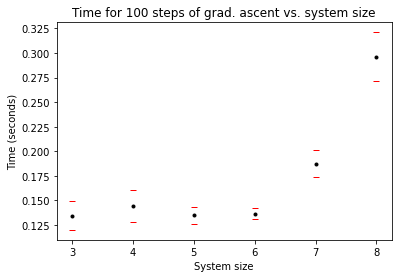

In [21]:
av_time_grad_ascent()

## Test threewise dist

In [23]:
from MaxEnt import ThreeWise 

In [24]:
N = 4
h = np.random.random_sample((N))
J = np.triu( np.random.random_sample((N,N)), 1)
K = np.zeros((N,N,N))

alpha = 1
for i in range(N-2):
    for j in range(i+1,N-1):
        for k in range(j+1, N):
            K[i,j,k] = alpha 
            alpha /= 10
ex = ThreeWise(N, h, J, K)

#calc 3 wise correlations
for i in range(N-2):
    for j in range(i+1,N-1):
        for k in range(j+1, N):
            print(f"Correlation between {i},{j},{k}\n", ex.expectation(lambda s: s[:,i]*s[:,j]*s[:,k]) )

Correlation between 0,1,2
 0.920532426867079
Correlation between 0,1,3
 0.8232659014923606
Correlation between 0,2,3
 0.8335528687031606
Correlation between 1,2,3
 0.8418426922603865
